In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 38.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yeanzc/telco-customer-churn-ibm-dataset/versions/1


In [2]:
import os

os.listdir(path)

['Telco_customer_churn.xlsx']

In [3]:
import pandas as pd

df = pd.read_excel(path + "/Telco_customer_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
import pandas as pd
xlsx = pd.ExcelFile(path + "/Telco_customer_churn.xlsx")
xlsx.sheet_names


['Telco_Churn']

In [5]:
df.shape

(7043, 33)

In [6]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [10]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [11]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [12]:
df['Churn Label'].value_counts()
df['Churn Value'].value_counts()


,count
Churn Value,
0,5174
1,1869


In [13]:
df = df.drop(['CustomerID', 'Lat Long', 'City', 'Churn Reason', 'Churn Label'], axis=1)
df.head()

,Count,Country,State,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,United States,California,90003,33.964131,-118.272783,Male,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,1,United States,California,90005,34.059281,-118.307420,Female,No,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,1,United States,California,90006,34.048013,-118.293953,Female,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372
3,1,United States,California,90010,34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,1,United States,California,90015,34.039224,-118.266293,Male,No,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340


In [14]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [15]:
df['Total Charges'].isnull().sum()


np.int64(11)

In [16]:
df = df.dropna(subset=['Total Charges'])

In [17]:
y = df['Churn Value']

In [18]:
X = df.drop(['Churn Value'], axis=1)

In [19]:
X.dtypes

,0
Count,int64
Country,object
State,object
Zip Code,int64
Latitude,float64
Longitude,float64
Gender,object
Senior Citizen,object
Partner,object
Dependents,object


In [20]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary columns
binary_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
le = LabelEncoder()
for col in binary_cols:
    X[col] = le.fit_transform(X[col])

# One-hot encode the rest
X = pd.get_dummies(X, columns=['Country', 'State', 'Multiple Lines', 'Internet Service', 'Online Security',
                               'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                               'Streaming Movies', 'Contract', 'Payment Method'], drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split

# y is your target
# X is your features after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (5625, 36) (5625,)
Test set: (1407, 36) (1407,)


**LOGISTIC REGRESSION**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize model
lr_model = LogisticRegression(max_iter=1000)

# Train model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)
y_pred_prob = lr_model.predict_proba(X_test)[:,1]  # probability for ROC-AUC


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Accuracy: 0.9189765458422174
Confusion Matrix:
 [[979  54]
 [ 60 314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1033
           1       0.85      0.84      0.85       374

    accuracy                           0.92      1407
   macro avg       0.90      0.89      0.90      1407
weighted avg       0.92      0.92      0.92      1407

ROC-AUC Score: 0.9755631021219541


**RANDOM FOREST**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # let trees expand fully
    random_state=42,
    class_weight='balanced' # handle churn imbalance
)


In [25]:
# Fit on training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:,1]  # probability for ROC-AUC


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf_prob))


Accuracy: 0.9331911869225302
Confusion Matrix:
 [[986  47]
 [ 47 327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1033
           1       0.87      0.87      0.87       374

    accuracy                           0.93      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407

ROC-AUC Score: 0.9788296379891392


**XGBOOST**

In [28]:
!pip install xgboost

In [29]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=5,            # tree depth
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight= y_train.value_counts()[0] / y_train.value_counts()[1]  # handle imbalance
)


In [30]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:,1]  # probability for ROC-AUC


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb_prob))


Accuracy: 0.9260838663823738
Confusion Matrix:
 [[961  72]
 [ 32 342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1033
           1       0.83      0.91      0.87       374

    accuracy                           0.93      1407
   macro avg       0.90      0.92      0.91      1407
weighted avg       0.93      0.93      0.93      1407

ROC-AUC Score: 0.9827795062405847


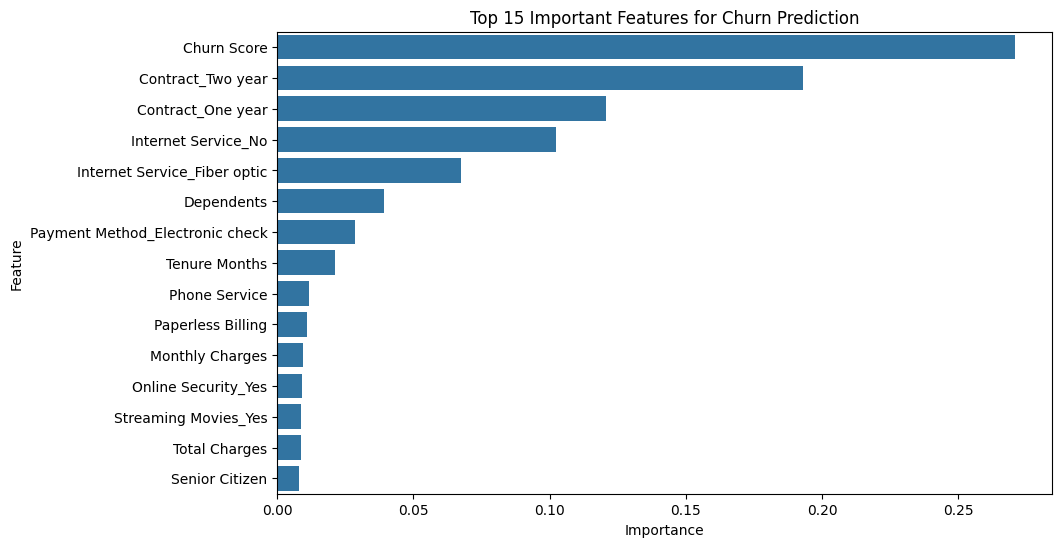

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance.head(15))
plt.title("Top 15 Important Features for Churn Prediction")
plt.show()
